# Assignment 2

Supervised Machine Learning Fundamentals

*Yirang Liu*

Netid: yl1041

## Instructions

*Instructions for all assignments can be found
[here](https://kylebradbury.github.io/ids705/notebooks/assignment_instructions.html).
Note: this assignment falls under collaboration Mode 2: Individual
Assignment – Collaboration Permitted. Please refer to the syllabus for
additional information. Please be sure to list the names of any students
that you worked with on this assignment. Total points in the assignment
add up to 90; an additional 10 points are allocated to professionalism
and presentation quality.*

## Learning Objectives:

By successfully completing this assignment you will be able to… -
Explain the bias-variance tradeoff of supervised machine learning and
the impact of model flexibility on algorithm performance - Perform
supervised machine learning training and performance evaluation -
Implement a k-nearest neighbors machine learning algorithm from scratch
in a style similar to that of popular machine learning tools like
`scikit-learn` - Describe how KNN classification works, the method’s
reliance on distance measurements, and the impact of higher
dimensionality on computational speed - Apply regression (linear
regression) and classification (KNN) supervised learning techniques to
data and evaluate the performance of those methods - Construct simple
feature transformations for improving model fit in linear models - Fit a
`scikit-learn` supervised learning technique to training data and make
predictions using it

## Exercise 1 - Conceptual Questions on Supervised Learning I

**\[4 points\]**

For each part below, indicate whether we would generally expect the
performance of a flexible statistical learning method to be *better* or
*worse* than an inflexible method. Justify your answer.

**1.1.** The sample size $n$ is extremely large, and the number of
predictors $p$ is small.

>__A flexible method will typically perform better.__ It's because with a large amount of data and relatively few predictors, a flexible model can learn complex relationships without as high a risk of overfitting. The large number of observations “balances out” the higher variance that comes from model flexibility.

**1.2.** The number of predictors $p$ is extremely large, and the number
of observations $n$ is small.

> __A flexible method will typically perform worse.__ It's becuase in high-dimensional settings (large *p*), flexible models are prone to overfitting, especially when the dataset is small. The large parameter space and limited data often lead to very high variance and poor generalization.

**1.3.** The relationship between the predictors and response is highly
non-linear.

> __A flexible method will typically perform better.__ It's because flexible methods (e.g. K-nearest neighbors with small *k*, or neural networks, or non-linear trees) can more easily adapt to complex, nonlinear relationships. Inflexible (e.g. purely linear) models may underfit if the true relationship is far from linear.

**1.4.** The variance of the error terms,
i.e. $\sigma^2 = Var(\epsilon)$, is extremely high.

> __A flexible method will typically perform worse.__ It's because if there is a great deal of irreducible noise in the data (large $\sigma ^2$), adding extra flexibility often means fitting noise rather than true structure, leading to higher variance of the predictions and worse performance on new data.

## Exercise 2 - Conceptual Questions on Supervised Learning II

**\[6 points\]**

For each of the following, (i) explain if each scenario is a
classification or regression problem AND why, (ii) indicate whether we
are most interested in inference or prediction for that problem AND why,
and (iii) provide the sample size $n$ and number of predictors $p$
indicated for each scenario.

**2.1.** We collect a set of data on the top 500 firms in the US. For
each firm we record profit, number of employees, industry and the CEO
salary. We are interested in understanding which factors affect CEO
salary.

>1. Since CEO salary is a continuous outcome, this is a regression problem.
>2. We care about which factors affect the response—this is primarily inference (trying to understand relationships/importance of predictors).
>3. - Sample size: $n=500$
>- Number of predictors: $p=3$ (profit, number of employees, and industry).
>- (CEO salary is the response, not a predictor.)

**2.2.** We are considering launching a new product and wish to know
whether it will be a success or a failure. We collect data on 20 similar
products that were previously launched. For each product we have
recorded whether it was a success or failure, price charged for the
product, marketing budget, competition price, and ten other variables.

>1. The response is success/failure, which is categorical, so this is a classification problem.
>2. We are primarily interested in predicting whether the new product will succeed or fail, so this is a prediction problem.
>3. - Sample size: $n=20$
>- Number of predictors: $p$=1[price]+1[marketing budget]+1[competition price]+10[other vars]=13

**2.3.** We are interested in predicting the % change in the US dollar
in relation to the weekly changes in the world stock markets. Hence we
collect weekly data for all of 2012. For each week we record the %
change in the dollar, the % change in the US market, the % change in the
British market, and the % change in the German market.

>1. % change in the dollar is a continuous value, so this is regression.
>2. We want to predict future % changes in the US dollar based on market changes; that is a prediction goal.
>3. - For 2012, there are typically 52 weeks in the year, so $n \approx 52$.
>- Number of predictors: $p=3$ (US market, British market, German market).

## Exercise 3 - Classification using KNN

**\[6 points\]**

The table below provides a training dataset containing six observations
(a.k.a. samples) ($n=6$) each with three predictors (a.k.a. features)
($p=3$), and one qualitative response variable (a.k.a. target).

*Table 1. Training dataset with $n=6$ observations in $p=3$ dimensions
with a categorical response, $y$*

| Obs.  | $x_1$ | $x_2$ | $x_3$ | $y$  |
|-------|-------|-------|-------|------|
| **1** | 0     | 3     | 0     | Red  |
| **2** | 2     | 0     | 0     | Red  |
| **3** | 0     | 1     | 3     | Red  |
| **4** | 0     | 1     | 2     | Blue |
| **5** | -1    | 0     | 1     | Blue |
| **6** | 1     | 1     | 1     | Red  |

We want to use the above training dataset to make a prediction,
$\hat{y}$, for an unlabeled test data observation where $x_1=x_2=x_3=0$
using $K$-nearest neighbors. You are given some code below to get you
started. *Note: coding is only required for part (a), for (b)-(d) please
provide your reasoning based on your answer to part (a)*.

**3.1.** Compute the Euclidean distance between each observation and the
test point, $x_1=x_2=x_3=0$. Present your answer in a table similar in
style to Table 1 with observations 1-6 as the row headers.

>1. obs 1: distance = $\sqrt{0^2+3^2+0^2}=3$
>2. obs 2: distance = $\sqrt{2^2+0^2+0^2}=2$
>3. obs 3: distance = $\sqrt{0^2+1^2+3^2}=\sqrt{10}$
>4. obs 4: distance = $\sqrt{0^2+1^2+2^2}=\sqrt{5}$
>5. obs 5: distance = $\sqrt{(-1)^2+0^2+1^2}=\sqrt{2}$
>6. obs 6: distance = $\sqrt{1^2+1^2+1^2}=\sqrt{3}$

| Obs.  | $x_1$ | $x_2$ | $x_3$ | $y$  | Distance to (0, 0, 0) |
|-------|-------|-------|-------|------|-----------------------|
| **1** | 0     | 3     | 0     | Red  | 3                     |
| **2** | 2     | 0     | 0     | Red  | 2                     |
| **3** | 0     | 1     | 3     | Red  | $\sqrt{10}$           |
| **4** | 0     | 1     | 2     | Blue | $\sqrt{5}$            |
| **5** | -1    | 0     | 1     | Blue | $\sqrt{2}$            |
| **6** | 1     | 1     | 1     | Red  | $\sqrt{3}$            |

**3.2.** What is our prediction, $\hat{y}$, when $K=1$ for the test
point? Why?

> My prediction, $\hat{y}$, is __Blue__. It is because, for $K=1$, we take the single closest neighbor to (0,0,0), which is the smallest distance is for Obs 5 and Obs 5’s label is Blue.

**3.3.** What is our prediction, $\hat{y}$, when $K=3$ for the test
point? Why?

> My prediction, $\hat{y}$, is __Red__ for the following reasons:
> For $K=3$, we take the 3 closest neighbors.
> From the table, we know they are:
>   1. Obs 5 -- Blue -- Distance = $\sqrt{2}$
>   2. Obs 6 -- Red --- Distance = $\sqrt{3}$
>   3. Obs 2 -- Red —-- Distance = 2
>
> Among these 3 neighbors, we have 2 Reds (Obs 6, Obs 2) and 1 Blue (Obs 5).
> The majority of the 3 is red

**3.4.** If the Bayes decision boundary (the optimal decision boundary)
in this problem is highly nonlinear, then would we expect the *best*
value of $K$ to be large or small? Why?

>I would expect the best $K$ to be small. A smaller $K$ in KNN leads to a more flexible (more wiggly) decision boundary, which can capture a highly nonlinear pattern. A large $K$ tends to produce a smoother, less flexible decision boundary.

In [2]:
import numpy as np

X = np.array([[ 0, 3, 0],
              [ 2, 0, 0],
              [ 0, 1, 3],
              [ 0, 1, 2],
              [-1, 0, 1],
              [ 1, 1, 1]])
y = np.array(['r','r','r','b','b','r'])

## Exercise 4 - Build your own classification algorithm

**\[18 points\]**

> **Note**
>
> [Data for this exercise can be downloaded
> here](https://github.com/kylebradbury/ids705/tree/main/notebooks/data/a1)

**4.1.** Build a working version of a binary KNN classifier using the
skeleton code below. We’ll use the `sklearn` convention that a
supervised learning algorithm has the methods `fit` which trains your
algorithm (for KNN that means storing the data) and `predict` which
identifies the K nearest neighbors and determines the most common class
among those K neighbors. *Note: Most classification algorithms typically
also have a method `predict_proba` which outputs the confidence score of
each prediction, but we will explore that in a later assignment. Please
use `NumPy` to implement euclidean distance function.*

In [2]:
import numpy as np

class Knn:
    def __init__(self):
        self.X_train = None
        self.y_train = None

    def fit(self, X, y):
        """
        Store the training data and labels
        """
        self.X_train = X
        self.y_train = y

    def predict(self, X_test, k):
        """
        For each row x in X_test:
            1) Compute distances from x to all points in X_train
            2) Take the k nearest neighbors
            3) Return the majority class among those neighbors
        """
        y_hat = []
        for x in X_test:
            # 1) Distances to all training points
            distances = np.sqrt(np.sum((self.X_train - x)**2, axis=1))
            # 2) Find the indices of the k smallest distances
            nn_idx = np.argsort(distances)[:k]
            # 3) Majority vote
            # (assuming y is 0 or 1, or if it's strings you can still do a count)
            neighbors = self.y_train[nn_idx]
            # e.g. for binary classification with string labels:
            # 'b' -> sum(neighbors == 'b')
            counts = {}
            for label in neighbors:
                counts[label] = counts.get(label, 0) + 1
            # pick the label with the highest count
            pred_label = max(counts, key=counts.get)
            y_hat.append(pred_label)
        return np.array(y_hat)

def accuracy(y_true, y_pred):
    return np.sum(y_true == y_pred) / len(y_true)

**4.2.** Load the datasets to be evaluated here. Each includes training
features ($\mathbf{X}$), and test features ($\mathbf{y}$) for both a low
dimensional dataset ($p = 2$ features/predictors) and a higher
dimensional dataset ($p = 100$ features/predictors). For each of these
datasets there are $n=1000$ observations of each. They can be found in
the data subfolder on github (see link above). Each file is labeled
similar to `A2_Q4_X_train_low.csv`, which lets you know whether the
dataset is of features, $X$, targets, $y$; training or testing; and low
or high dimensions.

In [3]:
X_train_low = np.loadtxt("https://raw.githubusercontent.com/kylebradbury/ids705/refs/heads/main/notebooks/data/a2/A2_Q4_X_train_low.csv", delimiter=",")
y_train_low = np.loadtxt("https://raw.githubusercontent.com/kylebradbury/ids705/refs/heads/main/notebooks/data/a2/A2_Q4_y_train_low.csv", delimiter=",")
X_test_low  = np.loadtxt("https://raw.githubusercontent.com/kylebradbury/ids705/refs/heads/main/notebooks/data/a2/A2_Q4_X_test_low.csv", delimiter=",")
y_test_low  = np.loadtxt("https://raw.githubusercontent.com/kylebradbury/ids705/refs/heads/main/notebooks/data/a2/A2_Q4_y_test_low.csv", delimiter=",")

In [4]:
X_train_high = np.loadtxt("https://raw.githubusercontent.com/kylebradbury/ids705/refs/heads/main/notebooks/data/a2/A2_Q4_X_train_high.csv", delimiter=",")
y_train_high = np.loadtxt("https://raw.githubusercontent.com/kylebradbury/ids705/refs/heads/main/notebooks/data/a2/A2_Q4_y_train_high.csv", delimiter=",")
X_test_high  = np.loadtxt("https://raw.githubusercontent.com/kylebradbury/ids705/refs/heads/main/notebooks/data/a2/A2_Q4_X_test_high.csv", delimiter=",")
y_test_high  = np.loadtxt("https://raw.githubusercontent.com/kylebradbury/ids705/refs/heads/main/notebooks/data/a2/A2_Q4_y_test_high.csv", delimiter=",")

**4.3.** Train your classifier on first the low dimensional dataset and
then the high dimensional dataset with $k=5$. Evaluate the
classification performance on the corresponding test data for each of
those trained models. Calculate the time it takes each model to make the
predictions and the overall accuracy of those predictions for each
corresponding set of test data - state each.

In [11]:
import time
# train classifier on the low dimensional dataset
start_low = time.time()
k = 5
model_low = Knn()
model_low.fit(X_train_low, y_train_low)
yhat_low = model_low.predict(X_test_low, k)
acc_low = accuracy(y_test_low, yhat_low)
end_low = time.time()
print("Low-dim dataset:  Accuracy:", acc_low)
print("Low-dim dataset:  Duration:", end_low-start_low, "seconds.")

Low-dim dataset:  Accuracy: 0.925
Low-dim dataset:  Duration: 0.10486125946044922 seconds.


In [13]:
# train classifier on the high dimensional dataset
start_high = time.time()
model_high = Knn()
model_high.fit(X_train_high, y_train_high)
yhat_high = model_high.predict(X_test_high, k)
acc_high = accuracy(y_test_high, yhat_high)
end_high = time.time()
print("High-dim dataset: Accuracy:", acc_high)
print("High-dim dataset:  Duration:", end_high-start_high, "seconds.")

High-dim dataset: Accuracy: 0.993
High-dim dataset:  Duration: 0.22011995315551758 seconds.


>|   | Accuracy | Duration(s) |
>|-------|-------|-------|
>| Low-dim dataset | 0.925     | 0.10486     |
>| High-dim dataset | 0.993     | 0.22011     |

**4.4.** Compare your implementation’s accuracy and computation time to
the scikit learn
[KNeighborsClassifier](http://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html)
class. How do the results and speed compare to your implementation?
*Hint: your results should be identical to that of the scikit-learn
implementation.*

In [29]:
from sklearn.neighbors import KNeighborsClassifier
import time

# Low dimensional
# not aligned with results above

knn_sklearn = KNeighborsClassifier(n_neighbors=5)
knn_sklearn.fit(X_train_low, y_train_low)
t0_low = time.time()
yhat_sklearn_low = knn_sklearn.predict(X_test_low)
t1_low = time.time()
acc_sklearn_low = accuracy(y_test_low, yhat_sklearn_low)

print("SKLearn Low-dim: accuracy:", acc_sklearn_low, "time:", t1_low - t0_low, "seconds.")

SKLearn Low-dim: accuracy: 0.925 time: 0.07962703704833984 seconds.


In [ ]:
# High dimensional
# not aligned with results above
knn_sklearn = KNeighborsClassifier(n_neighbors=5)
knn_sklearn.fit(X_train_high, y_train_high)
t0_high = time.time()
yhat_sklearn_high = knn_sklearn.predict(X_test_high)
t1_high = time.time()
acc_sklearn_high = accuracy(y_test_high, yhat_sklearn_high)

print("SKLearn High-dim: accuracy:", acc_sklearn_high, "time:", t1_high - t0_high, "seconds.")

SKLearn High-dim: accuracy: 0.993 time: 0.010210037231445312 seconds.




**4.5.** Some supervised learning algorithms are more computationally
intensive during training than testing. What are the drawbacks of the
prediction process being slow? In what cases in practice might slow
testing (inference) be more problematic than slow training?

>- If testing (inference) is slow, then for each new instance you want to classify, it takes a long time to produce an answer. This can be problematic in:
>    - Real-time systems (e.g. self-driving cars, live recommendation engines).
>    - Large-scale applications (e.g. thousands of queries per second).
>- By contrast, if training is slow (but inference is fast), it’s often acceptable for offline or batch training (e.g. you train overnight, then quickly deploy predictions).
>- Hence, a model (like naive KNN) that can be fast to train (just storing data) but slow to predict can be a problem if you need real-time predictions.

In [ ]:
# Skeleton code for part (a) to write your own kNN classifier

class Knn:
# k-Nearest Neighbor class object for classification training and testing
    def __init__(self):
        
    def fit(self, x, y):
        # Save the training data to properties of this class
        
    def predict(self, x, k):
        y_hat = [] # Variable to store the estimated class label for 
        # Calculate the distance from each vector in x to the training data
        
        # Return the estimated targets
        return y_hat

# Metric of overall classification accuracy
#  (a more general function, sklearn.metrics.accuracy_score, is also available)
def accuracy(y,y_hat):
    nvalues = len(y)
    accuracy = sum(y == y_hat) / nvalues
    return accuracy

## Exercise 5 - Bias-variance tradeoff: exploring the tradeoff with a KNN classifier

**\[20 points\]**

This exercise will illustrate the impact of the bias-variance tradeoff
on classifier performance by investigating how model flexibility impacts
classifier decision boundaries. For this problem, please us
Scikit-learn’s KNN implementation rather than your own implementation,
as you did at the end of the last question.

**5.1.** Create a synthetic dataset (with both features and targets).
Use the
[`make_moons`](http://scikit-learn.org/stable/modules/generated/sklearn.datasets.make_moons.html#sklearn.datasets.make_moons)
module with the parameter `noise=0.35` to generate 1000 random samples.

In [42]:
from sklearn.datasets import make_moons
import numpy as np

X_all, y_all = make_moons(n_samples=1000, noise=0.35, random_state=42)

**5.2.** Visualize your data: scatterplot your random samples with each
class in a different color.

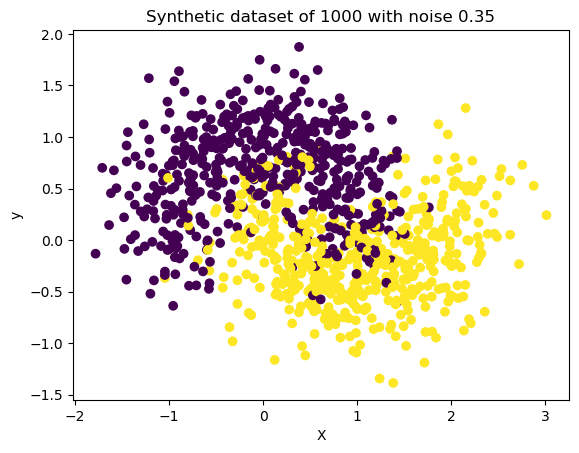

In [49]:
import matplotlib.pyplot as plt

x_coords = X_all[:, 0]
y_coords = X_all[:, 1]
plt.scatter(x_coords, y_coords, c=y_all, cmap='viridis')
plt.title('Synthetic dataset of 1000 with noise 0.35')
plt.xlabel('X')
plt.ylabel('y')
plt.show()


**5.3.** Create 3 different data subsets by selecting 100 of the 1000
data points at random three times (with replacement). For each of these
100-sample datasets, fit three separate k-Nearest Neighbor classifiers
with: $k = \{1, 25, 50\}$. This will result in 9 combinations (3
datasets, each with 3 trained classifiers).

In [50]:
indices = np.arange(1000)
subsets = []
for i in range(3):
    chosen = np.random.choice(indices, size=100, replace=False)
    # why replacement = false for with replacement
    X_sub = X_all[chosen, :]
    y_sub = y_all[chosen]
    subsets.append((X_sub, y_sub))

from sklearn.neighbors import KNeighborsClassifier

k_values = [1, 25, 50]
models = []

for (X_sub, y_sub) in subsets:
    row_models = []
    for k in k_values:
        knn = KNeighborsClassifier(n_neighbors=k)
        knn.fit(X_sub, y_sub)
        row_models.append(knn)
    models.append(row_models)
# 'models' is now a list of 3 (subsets) x 3 (k-values) trained classifiers


**5.4.** For each combination of dataset and trained classifier plot the
decision boundary (similar in style to Figure 2.15 from *Introduction to
Statistical Learning*). This should form a 3-by-3 grid. Each column
should represent a different value of $k$ and each row should represent
a different dataset.

**5.5.** What do you notice about the difference between the decision
boundaries in the rows and the columns in your figure? Which decision
boundaries appear to best separate the two classes of data with respect
to the training data? Which decision boundaries vary the most as the
training data change? Which decision boundaries do you anticipate will
generalize best to unseen data and why?

>- Differences among rows: Each row is a different random subset of 100 points. The decision boundaries vary from row to row because the training sample changes. This variation across different training sets is related to variance.
>- Differences among columns: The columns have different $k$
>   - $k=1$: Very “wiggly” (complex) boundary. Likely low bias, but high variance from subset to subset (overfitting). 
>   - $k=50$: Smoother boundary (high bias, but lower variance). 
>   - $k=25$: Intermediate complexity.

**5.6.** Explain the bias-variance tradeoff using the example of the
plots you made in this exercise and its implications for training
supervised machine learning algorithms.

Notes and tips for plotting decision boundaries (as in part 5.4): -
*Resource for plotting decision boundaries with meshgrid and contour:
https://scikit-learn.org/stable/auto_examples/neighbors/plot_classification.html* -
If you would like to change the colors of the background, and do not
like any of the existing cmap available in matplotlib, you can make your
own cmap using the 2 sets of rgb values. Sample code (replace r, g, b
with respective rgb values):

>- When $k=1$, the classifier can fit tiny local idiosyncrasies of whichever 100 points it sees—low bias (it can fit “anything”), high variance (small changes in the training set can drastically change the decision boundary).
>- When $k=50$, the decision boundary is smoother—higher bias (it may underfit if the boundary is truly complicated) but lower variance across different training sets.
>- This illustrates the fundamental bias-variance tradeoff: choosing a model that is too flexible can overfit, while a model that is too simple can underfit.

In [ ]:
from matplotlib.colors import LinearSegmentedColormap
newcmp = LinearSegmentedColormap.from_list("new", [(r/255, g/255, b/255), (r/255, g/255, b/255)], N=2)

## Exercise 6 - Bias-variance trade-off II: Quantifying the tradeoff

**\[18 points\]**

This exercise explores the impact of the bias-variance tradeoff on
classifier performance by looking at the performance on both training
and test data.

Here, the value of $k$ determines how flexible our model is.

**6.1.** Using the function created earlier to generate random samples
(using the `make_moons` function setting the `noise` parameter to 0.35),
create a new set of 1000 random samples, and call this dataset your test
set and the previously created dataset your training set.

In [67]:
# create the test set of 1000 random samples
X_sample, y_sample = make_moons(n_samples=1000, noise=0.35, random_state=123)
X_test = X_sample[:, 0].reshape(-1, 1)
y_test = y_sample

# rename the previous set as training set
X_train = X_all[:, 0].reshape(-1, 1)
y_train = y_all

**6.2.** Train a kNN classifier on your training set for
$k = 1,2,...500$. Apply each of these trained classifiers to both your
training dataset and your test dataset and plot the classification error
(fraction of incorrect predictions).

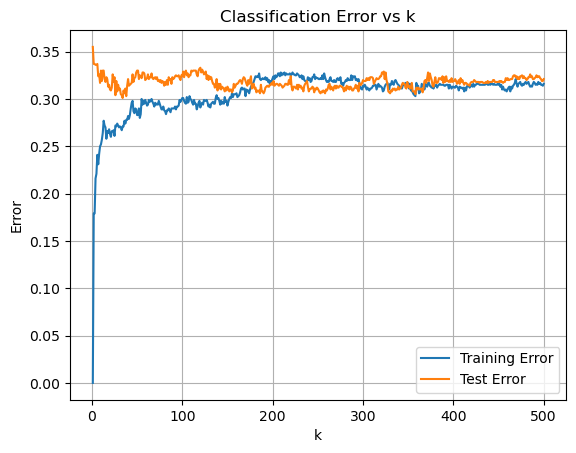

In [70]:
train_err = []
test_err = []
for k in range(1, 501):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)

    yhat_train = knn.predict(X_train)
    yhat_test  = knn.predict(X_test)

    train_err.append(1.0 - accuracy(y_train, yhat_train))
    test_err.append(1.0 - accuracy(y_test, yhat_test))

k_value = range(1,501)
plt.plot(k_value, train_err, label="Training Error")
plt.plot(k_value, test_err, label="Test Error")
plt.title('Classification Error vs k')
plt.xlabel('k')
plt.ylabel('Error')
plt.legend()
plt.grid()
plt.show()

**6.3.** What trend do you see in the results?

>- The training error starts from nearly 0 due to overfitting and increases as $k$ increases.
>- The test decreases as $k$ increases.

**6.4.** What values of $k$ represent high bias and which represent high
variance?

>- Small values of $k$ represent high bias 
>- Big values of $k$ represent high variance

**6.5.** What is the optimal value of $k$ and why?

>- The optimal value of $k$ is around 300 which minimizes the test error.

**6.6.** In KNN classifiers, the value of k controls the flexibility of
the model - what controls the flexibility of other models?

>- The number of layers controls the flexibility of neural networks
>- The 

## Exercise 7 - Linear regression and nonlinear transformations

**\[18 points\]**

> **Note**
>
> [Data for this exercise can be downloaded
> here](https://github.com/kylebradbury/ids705/tree/main/notebooks/data/a1)

Linear regression can be used to model nonlinear relationships when
feature variables are properly transformed to represent the
nonlinearities in the data folder. In this exercise, you’re given
training and test data contained in files “A2_Q7_train.csv” and
“A2_Q7_test.csv” in the data. Your goal is to develop a regression
algorithm from the training data that performs well on the test data.

*Hint: Use the scikit learn
[LinearRegression](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html)
module.*

**7.1.** Create a scatter plot of your training data.

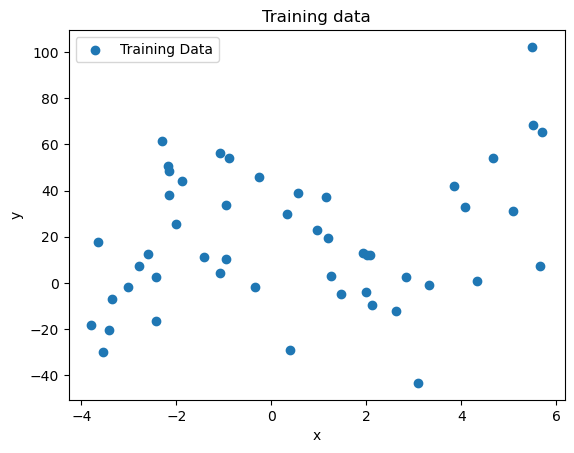

In [72]:
import pandas as pd
import matplotlib.pyplot as plt

train = pd.read_csv("https://raw.githubusercontent.com/kylebradbury/ids705/refs/heads/main/notebooks/data/a2/A2_Q7_train.csv")
test = pd.read_csv("https://raw.githubusercontent.com/kylebradbury/ids705/refs/heads/main/notebooks/data/a2/A2_Q7_test.csv")

x_train_Q7 = train['x'].values
y_train_Q7 = train['y'].values
x_test_Q7  = test['x'].values
y_test_Q7  = test['y'].values

plt.scatter(x_train_Q7, y_train_Q7, label='Training Data')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Training data')
plt.legend()
plt.show()

**7.2.** Estimate a linear regression model ($y = a_0 + a_1 x$) for the
training data and calculate both the $R^2$ value and mean square error
for the fit of that model for the training data. Also provide the
equation representing the estimated model (e.g. $y = a_0 + a_1 x$, but
with the estimated coefficients inserted. Consider this your baseline
model against which you will compare other model options. *Evaluating
performance on the training data is not a measure of how well this model
would generalize to unseen data. We will evaluate performance on the
test data once we see our models fit the training data decently well.*

In [74]:
from sklearn.linear_model import LinearRegression
import numpy as np

# Reshape x to (n,1) for sklearn
X_train_lin = x_train_Q7.reshape(-1,1)
y_train_lin = y_train_Q7.reshape(-1,1)
model_linear = LinearRegression()
model_linear.fit(X_train_lin, y_train_lin)

a0 = model_linear.intercept_
a1 = model_linear.coef_[0]

print("Model: y = %.4f + %.4f*x" % (a0, a1))
r2_train = model_linear.score(X_train_lin, y_train_lin)
# Mean squared error on training data
yhat_train_lin = model_linear.predict(X_train_lin)
mse_train_lin = np.mean((y_train_lin - yhat_train_lin)**2)

print("R^2 (train):", r2_train)
print("MSE (train):", mse_train_lin)

Model: y = 17.2049 + 2.5907*x
R^2 (train): 0.06486123304769698
MSE (train): 791.4167471701106


/var/folders/cv/pb7bdsd97cq7qt_b65khbfvr0000gn/T/ipykernel_26363/3816160442.py:13: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print("Model: y = %.4f + %.4f*x" % (a0, a1))


>Model: y = 17.2049 + 2.5907*x

**7.3.** If features can be nonlinearly transformed, a linear model may
incorporate those non-linear feature transformation relationships in the
training process. From looking at the scatter plot of the training data,
choose a transformation of the predictor variable, $x$ that may make
sense for these data. This will be a multiple regression model of the
form $y = a_0 + a_1 z_1 + a_2 z_2 + \ldots + a_n z_n$. Here $z_i$ could
be any transformations of x - perhaps it’s $\frac{1}{x}$, $log(x)$,
$sin(x)$, $x^k$ (where $k$ is any power of your choosing). Provide the
estimated equation for this multiple regression model (e.g. if you chose
your predictors to be $z_1 = x$ and $z_2 = log(x)$, your model would be
of the form $y = a_0 + a_1 x + a_2 log(x)$. Also provide the $R^2$ and
mean square error of the fit for the training data.

In [75]:
X_train_poly = np.column_stack( (x_train_Q7, x_train_Q7**2) )
model_poly = LinearRegression()
model_poly.fit(X_train_poly, y_train_Q7)

a0_ = model_poly.intercept_
a1_, a2_ = model_poly.coef_

print("Model: y = %.4f + %.4f*x + %.4f*x^2" % (a0_, a1_, a2_))
r2_train_poly = model_poly.score(X_train_poly, y_train_Q7)
yhat_train_poly = model_poly.predict(X_train_poly)
mse_train_poly = np.mean((y_train_Q7 - yhat_train_poly)**2)

print("R^2 (train):", r2_train_poly)
print("MSE (train):", mse_train_poly)

Model: y = 12.9445 + 1.6056*x + 0.5618*x^2
R^2 (train): 0.08529040403484778
MSE (train): 774.1273473276405


**7.4.** Visualize the model fit to the training data. Using both of the
models you created in parts (b) and (c), plot the original data (as a
scatter plot) AND the curves representing your models (each as a
separate curve) from (b) and (c).

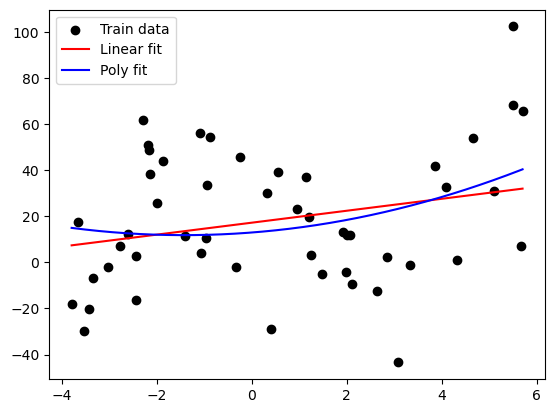

In [77]:
# Sort x for nice plotting
x_plot = np.linspace(min(x_train_Q7), max(x_train_Q7), 200)
# For linear model
y_plot_linear = model_linear.predict(x_plot.reshape(-1,1))

# For poly model of degree 2
X_plot_poly = np.column_stack([x_plot, x_plot**2])
y_plot_poly = model_poly.predict(X_plot_poly)

plt.scatter(x_train_Q7, y_train_Q7, color='black', label='Train data')
plt.plot(x_plot, y_plot_linear, 'r-', label='Linear fit')
plt.plot(x_plot, y_plot_poly, 'b-', label='Poly fit')
plt.legend()
plt.show()


**7.5.** Now its time to compare your models and evaluate the
generalization performance on held out test data. Using the models above
from (b) an (c), apply them to the test data and estimate the $R^2$ and
mean square error of the test dataset.

In [79]:
# For linear model
X_test_lin = x_test_Q7.reshape(-1,1)
yhat_test_lin = model_linear.predict(X_test_lin)
r2_test_lin = model_linear.score(X_test_lin, y_test_Q7)
mse_test_lin = np.mean((y_test_Q7 - yhat_test_lin)**2)

# For poly model
X_test_poly = np.column_stack([x_test_Q7, x_test_Q7**2])
yhat_test_poly = model_poly.predict(X_test_poly)
r2_test_poly = model_poly.score(X_test_poly, y_test_Q7)
mse_test_poly = np.mean((y_test_Q7 - yhat_test_poly)**2)

print("R^2 (r2_test_poly):", r2_test_poly)
print("MSE (mse_test_poly):", mse_test_poly)

R^2 (r2_test_poly): -0.12025627926664306
MSE (mse_test_poly): 1104.2014232420704


**7.6.** Which models perform better on the training data, and which on
the test data? Why?

>*Often, the more complex (transformed) model will fit training data better (higher $R^2$ , lower MSE).*
>*For some reason, mine has the original linear model fits better*
>*However, whether it also performs better on the test set depends on whether it’s truly capturing the relationship or if it’s overfitting. Sometimes a moderate polynomial or transformation improves test performance if the relationship is indeed nonlinear.*

**7.7.** Imagine that the test data were significantly different from
the training dataset. How might this affect the predictive capability of
your model? How would the accuracy of generalization performance be
impacted? Why?

*To help get you started - here’s some code to help you load in the data
for this exercise (you’ll just need to update the path)*:

In [20]:
import numpy as np
import pandas as pd

path = './data/a2'
train = pd.read_csv(path + 'A2_Q7_train.csv')
test = pd.read_csv(path + 'A2_Q7_test.csv')

x_train = train.x.values
y_train = train.y.values

x_test = test.x.values
y_test = test.y.values